## RL Platforms Seminar
### PettingZoo

#### Group Members: Khosravi & Lashgari

### Install Libraries

In [1]:
! pip install pettingzoo[atari]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.0/552.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 847.8/847.8 kB 35.2 MB/s eta 0:00:00
  Created wheel for multi-agent-ale-py: filename=multi_agent_ale_py-0.1.11-cp310-cp310-linux_x86_64.whl size=721819 sha256=215c0c038710831598609dde56622cb589a4519d10a582af74b76d8e9195f066
  Stored in directory: /root/.cache/pip/wheels/08/75/64/8ad68adb0da26405c4b18c291b9c322c44d3e99c16b0f3b890
Successfully built multi-agent-ale-py
  Attempting uninstall: pygame
    Found existing installation: pygame 2.6.1
    Uninstalling pygame-2.6.1:
      Successfully uninstalled pygame-2.6.1


In [2]:
! pip install autorom
! AutoROM
! AutoROM --install-dir /content/
! AutoROM --accept-license

AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	/usr/local/lib/python3.10/dist-packages/AutoROM/roms
	/usr/local/lib/python3.10/dist-packages/multi_agent_ale_py/roms

Existing ROMs will be overwritten.

I own a license to these Atari 2600 ROMs.
I agree to not distribute these ROMs and wish to proceed: [Y/n]: y
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/adventure.bin
Installed /usr/local/lib/python3.10/dist-packages/multi_agent_ale_py/roms/adventure.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/air_raid.bin
Installed /usr/local/lib/python3.10/dist-packages/multi_agent_ale_py/roms/air_raid.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/alien.bin
Installed /usr/local/lib/python3.10/dist-packages/multi_agent_ale_py/roms/alien.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/amidar.bin
Installed /usr/local/lib/python3.10/dist-packages/multi_agent_ale_py/roms/amidar.bin
Installed /usr/local/

### Creating Boxing Environment

In [3]:
from pettingzoo.atari import boxing_v2

In [4]:
env = boxing_v2.env(render_mode="human")

In [5]:
env.reset()

### Check agents and sate action spaces

In [6]:
env.agents

['first_0', 'second_0']

In [7]:
for agent in env.agents:
    print(agent, env.observation_space(agent))

first_0 Box(0, 255, (210, 160, 3), uint8)
second_0 Box(0, 255, (210, 160, 3), uint8)


In [8]:
for agent in env.agents:
    print(agent, env.action_space(agent))

first_0 Discrete(18)
second_0 Discrete(18)


### Observe the Environment

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [110, 156,  66],
        [110, 156,  66],
        [110, 156,  66]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [110, 156,  66],
        [110, 156,  66],
        [110, 156,  66]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [110, 156,  66],
        [110, 156,  66],
        [110, 156,  66]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [110, 156,  66],
        [110, 156,  66],
        [110, 156,  66]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [110, 156,  66],
        [110, 156,  66],
        [110, 156,  66]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [110, 156,  66],
        [110, 156,  66],
        [110, 156,  66]]], dtype=uint8)
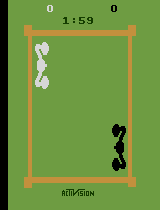

In [9]:
observation, reward, termination, trunc, info = env.last()
observation

### Random Action Selection

In [10]:
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))
from IPython.display import clear_output, display
from PIL import Image
import numpy as np

env = boxing_v2.env(render_mode="rgb_array")
env.reset()

i = 0
for agent in env.agent_iter():
    observation, reward, termination, trunc, info = env.last()
    action = None
    if not (termination or trunc):
        action = np.random.randint(18)
    env.step(action)
    img = env.render()

    # Display image with IPython; clear last iPython display on create
    # result = Image.fromarray(np.array(img), 'RGB')
    # result.save(f'/content/imageboxing_{i}.png')
    # i+=1

env.close()

### Implemetn E-Greedy Action Selection

In [14]:
import os
os.environ['SDL_VIDEODRIVER'] = 'dummy'
import pygame
pygame.display.set_mode((640, 480))
from IPython.display import clear_output, display
from PIL import Image
import numpy as np
from pettingzoo.atari import boxing_v2

# Parameters for epsilon-greedy
epsilon = 0.1  # Exploration rate
alpha = 0.1    # Learning rate
gamma = 0.99   # Discount factor
action_space_size = 18  # Number of actions in boxing

# Initialize a basic Q-table; with image-based environments, this would typically be replaced with a function approximator
q_table = np.zeros((1, action_space_size))

# Boxing environment setup
env = boxing_v2.env(render_mode="rgb_array")
env.reset()

for agent in env.agent_iter():
    observation, reward, termination, trunc, info = env.last()
    state = 0  # Placeholder for a proper state extraction mechanism
    action = None

    if not (termination or trunc):
        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = np.random.randint(action_space_size)  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Step the environment
        env.step(action)
        next_state = 0  # Update if states are properly extracted from observations
        next_max = np.max(q_table[next_state])

        # Q-learning update
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * next_max - q_table[state, action])
        state = next_state  # Update current state

        # Render and save image
        img = env.render()
        # Uncomment below to save images
        result = Image.fromarray(np.array(img), 'RGB')
        result.save(f'/content/image/imageboxing_{i}.png')
        i+=1
    else:
        env.step(None)

env.close()


In [15]:
!zip -r /content/image.zip /content/image/
from google.colab import files
files.download("/content/image.zip")

Streaming output truncated to the last 5000 lines.
  adding: content/image/imageboxing_12410.png (deflated 10%)
  adding: content/image/imageboxing_10070.png (deflated 9%)
  adding: content/image/imageboxing_6335.png (deflated 11%)
  adding: content/image/imageboxing_10698.png (deflated 8%)
  adding: content/image/imageboxing_9496.png (deflated 8%)
  adding: content/image/imageboxing_13852.png (deflated 11%)
  adding: content/image/imageboxing_10176.png (deflated 8%)
  adding: content/image/imageboxing_8594.png (deflated 8%)
  adding: content/image/imageboxing_9964.png (deflated 8%)
  adding: content/image/imageboxing_6700.png (deflated 9%)
  adding: content/image/imageboxing_3932.png (deflated 7%)
  adding: content/image/imageboxing_5559.png (deflated 8%)
  adding: content/image/imageboxing_7135.png (deflated 9%)
  adding: content/image/imageboxing_2124.png (deflated 10%)
  adding: content/image/imageboxing_5563.png (deflated 8%)
  adding: content/image/imageboxing_8063.png (deflated 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>